In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)

In [2]:
df = pd.read_csv('../DATA/hotel_reservations.csv')

In [ ]:
#Exploratory Data Analysis

In [3]:
df.head(5)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
df.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

In [6]:
#Observations
# - 36275 bookings
# - the average number of adults is 2 (1.8 rounded to the nearest number)
# - the avergae number of children is 0 (0.1 rounded to the nearest whole number)
# - the average number of weekend nights per booking is 1
# - the average number of week nights per booking is 2
# - the average booking lead time is 85 days
# - the average price per room is $103.42

In [7]:
df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

In [8]:
print('The shape of the Data: {}\n'.format(df.shape))

The shape of the Data: (36275, 19)



In [9]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 19)


In [10]:
print("Number of unique features in the dataset is: ")
print(df.select_dtypes(exclude=["object"]).nunique())
print("\nNumber of unique features in categorical data is: ")
print(df.select_dtypes(include=["object"]).nunique())

Number of unique features in the dataset is: 
no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
required_car_parking_space                 2
lead_time                                352
arrival_year                               2
arrival_month                             12
arrival_date                              31
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3930
no_of_special_requests                     6
dtype: int64

Number of unique features in categorical data is: 
Booking_ID             36275
type_of_meal_plan          4
room_type_reserved         7
market_segment_type        5
booking_status             2
dtype: int64


In [11]:
df.drop(columns=['Booking_ID'], inplace=True)

array([[<AxesSubplot:title={'center':'no_of_adults'}>,
        <AxesSubplot:title={'center':'no_of_children'}>,
        <AxesSubplot:title={'center':'no_of_weekend_nights'}>,
        <AxesSubplot:title={'center':'no_of_week_nights'}>],
       [<AxesSubplot:title={'center':'required_car_parking_space'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_year'}>,
        <AxesSubplot:title={'center':'arrival_month'}>],
       [<AxesSubplot:title={'center':'arrival_date'}>,
        <AxesSubplot:title={'center':'repeated_guest'}>,
        <AxesSubplot:title={'center':'no_of_previous_cancellations'}>,
        <AxesSubplot:title={'center':'no_of_previous_bookings_not_canceled'}>],
       [<AxesSubplot:title={'center':'avg_price_per_room'}>,
        <AxesSubplot:title={'center':'no_of_special_requests'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

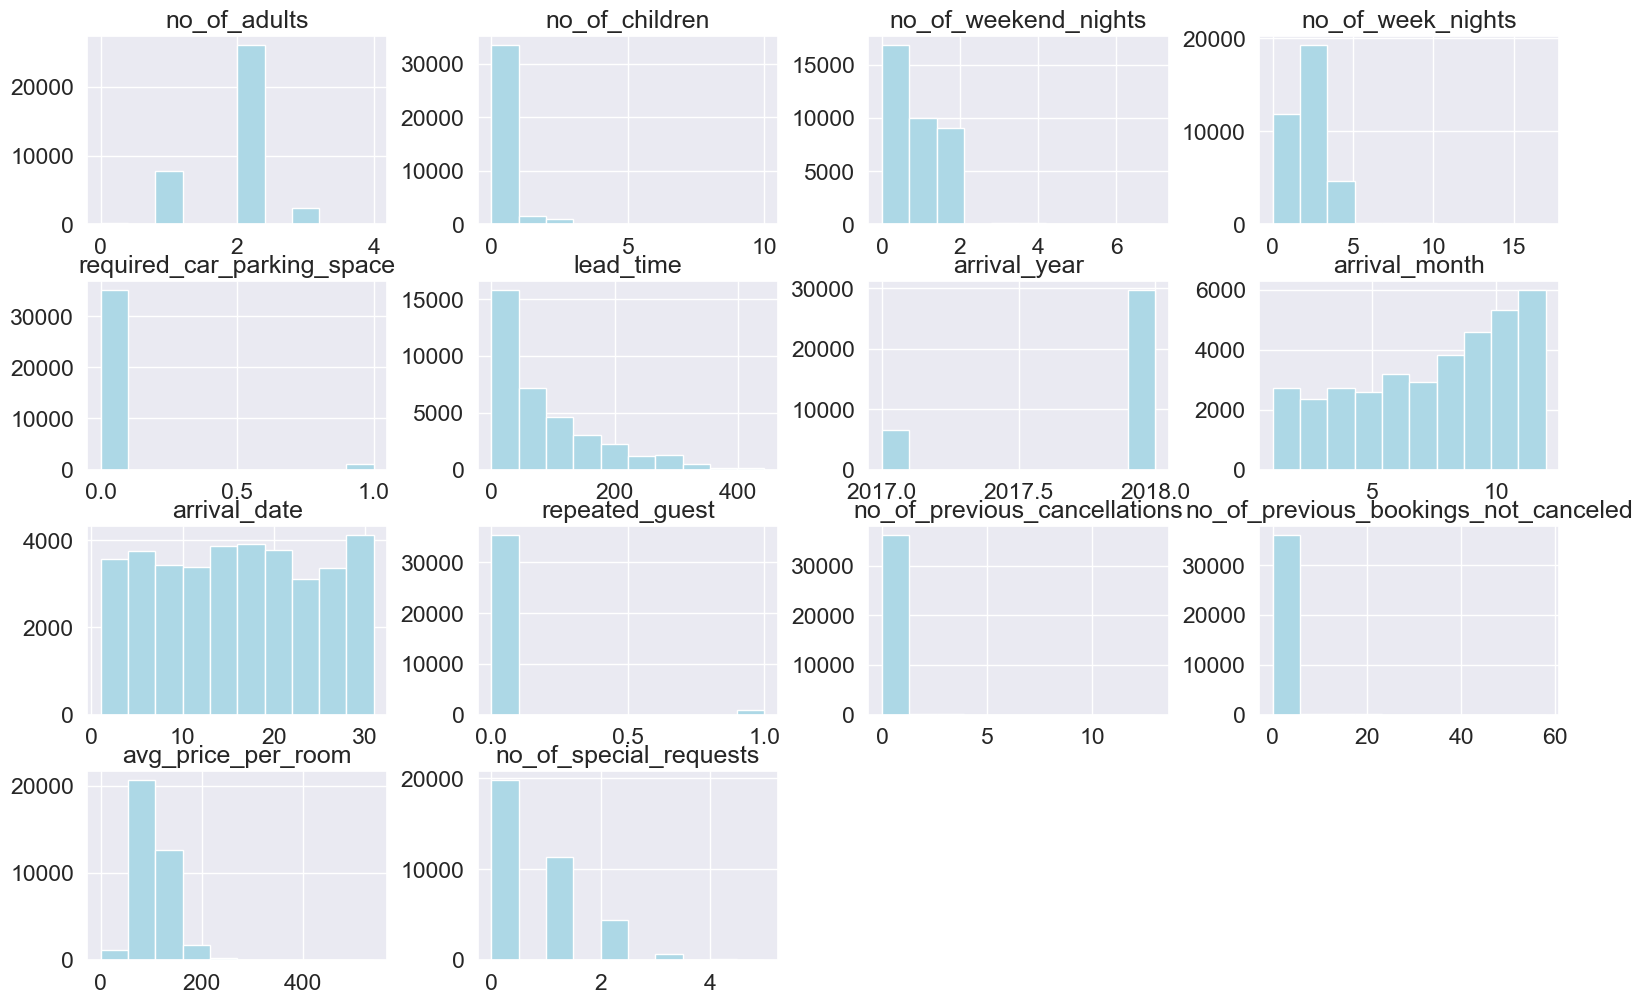

In [12]:
df.hist
df.hist(figsize=(19,12), color="LightBlue")

<AxesSubplot:>

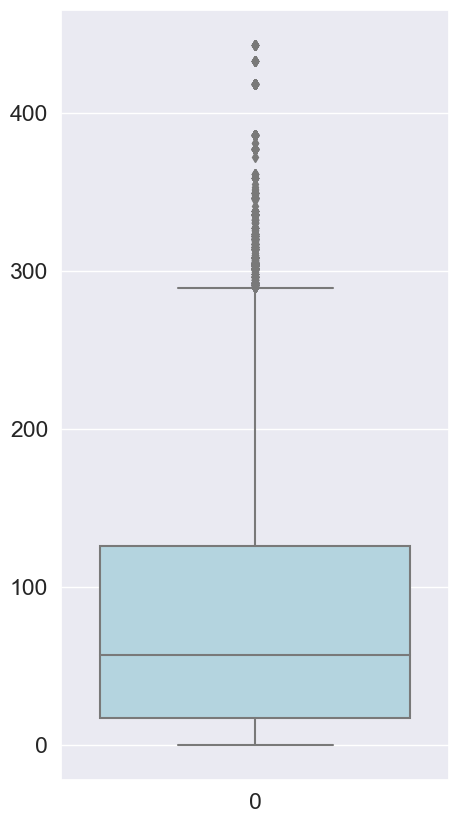

In [14]:
plt.figure(figsize=(5,10))
sns.boxplot(data=df['lead_time'], color="LightBlue")

<AxesSubplot:>

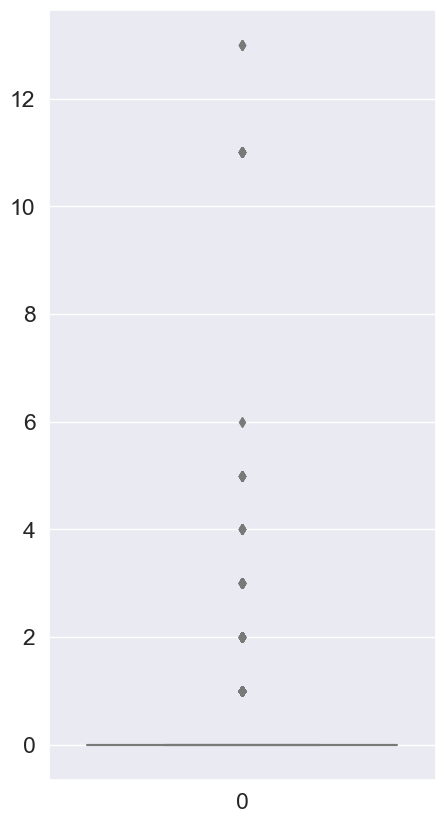

In [15]:
plt.figure(figsize=(5,10))
sns.boxplot(data=df['no_of_previous_cancellations'], color="LightBlue")

<AxesSubplot:>

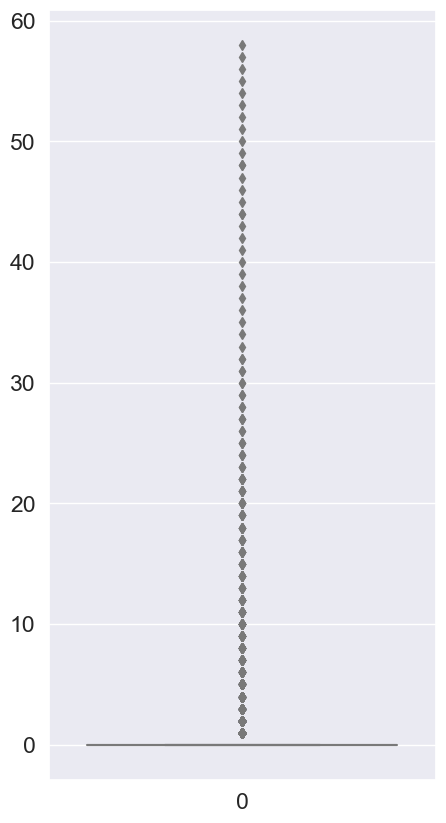

In [16]:
plt.figure(figsize=(5,10))
sns.boxplot(data=df['no_of_previous_bookings_not_canceled'], color="LightBlue")

In [17]:
df.corr()

no_of_adults  no_of_children  \
no_of_adults                              1.000000       -0.019787   
no_of_children                           -0.019787        1.000000   
no_of_weekend_nights                      0.103316        0.029478   
no_of_week_nights                         0.105622        0.024398   
required_car_parking_space                0.011429        0.034244   
lead_time                                 0.097287       -0.047091   
arrival_year                              0.076719        0.045983   
arrival_month                             0.021841       -0.003076   
arrival_date                              0.026338        0.025482   
repeated_guest                           -0.192277       -0.036348   
no_of_previous_cancellations             -0.047426       -0.016390   
no_of_previous_bookings_not_canceled     -0.119166       -0.021189   
avg_price_per_room                        0.296886        0.337728   
no_of_special_requests                    0.189401        0.124486   

                                      no_of_weekend_nights  no_of_week_nights  \
no_of_adults                                      0.103316           0.105622   
no_of_children                                    0.029478           0.024398   
no_of_weekend_nights                              1.000000           0.179577   
no_of_week_nights                                 0.179577           1.000000   
required_car_parking_space                       -0.031111          -0.048784   
lead_time                                         0.046595           0.149650   
arrival_year                                      0.055357           0.032672   
arrival_month                                    -0.009894           0.037376   
arrival_date                                      0.027304          -0.009305   
repeated_guest                                   -0.067107          -0.099764   
no_of_previous_cancellations                     -0.020690          -0.030080   
no_of_previous_bookings_not_canceled             -0.026312          -0.049344   
avg_price_per_room                               -0.004525           0.022753   
no_of_special_requests                            0.060593           0.045994   

                                      required_car_parking_space  lead_time  \
no_of_adults                                            0.011429   0.097287   
no_of_children                                          0.034244  -0.047091   
no_of_weekend_nights                                   -0.031111   0.046595   
no_of_week_nights                                      -0.048784   0.149650   
required_car_parking_space                              1.000000  -0.066445   
lead_time                                              -0.066445   1.000000   
arrival_year                                            0.015684   0.143439   
arrival_month                                          -0.015505   0.136814   
arrival_date                                           -0.000037   0.006479   
repeated_guest                                          0.110909  -0.135984   
no_of_previous_cancellations                            0.027106  -0.045723   
no_of_previous_bookings_not_canceled                    0.063810  -0.078137   
avg_price_per_room                                      0.061304  -0.062596   
no_of_special_requests                                  0.087922  -0.101645   

                                      arrival_year  arrival_month  \
no_of_adults                              0.076719       0.021841   
no_of_children                            0.045983      -0.003076   
no_of_weekend_nights                      0.055357      -0.009894   
no_of_week_nights                         0.032672       0.037376   
required_car_parking_space                0.015684      -0.015505   
lead_time                                 0.143439       0.136814   
arrival_year                              1.000000      -0.339689   
arrival_month                    

Text(0.5, 1.0, 'Correlation Heatmap of Hotel Reservation Data')

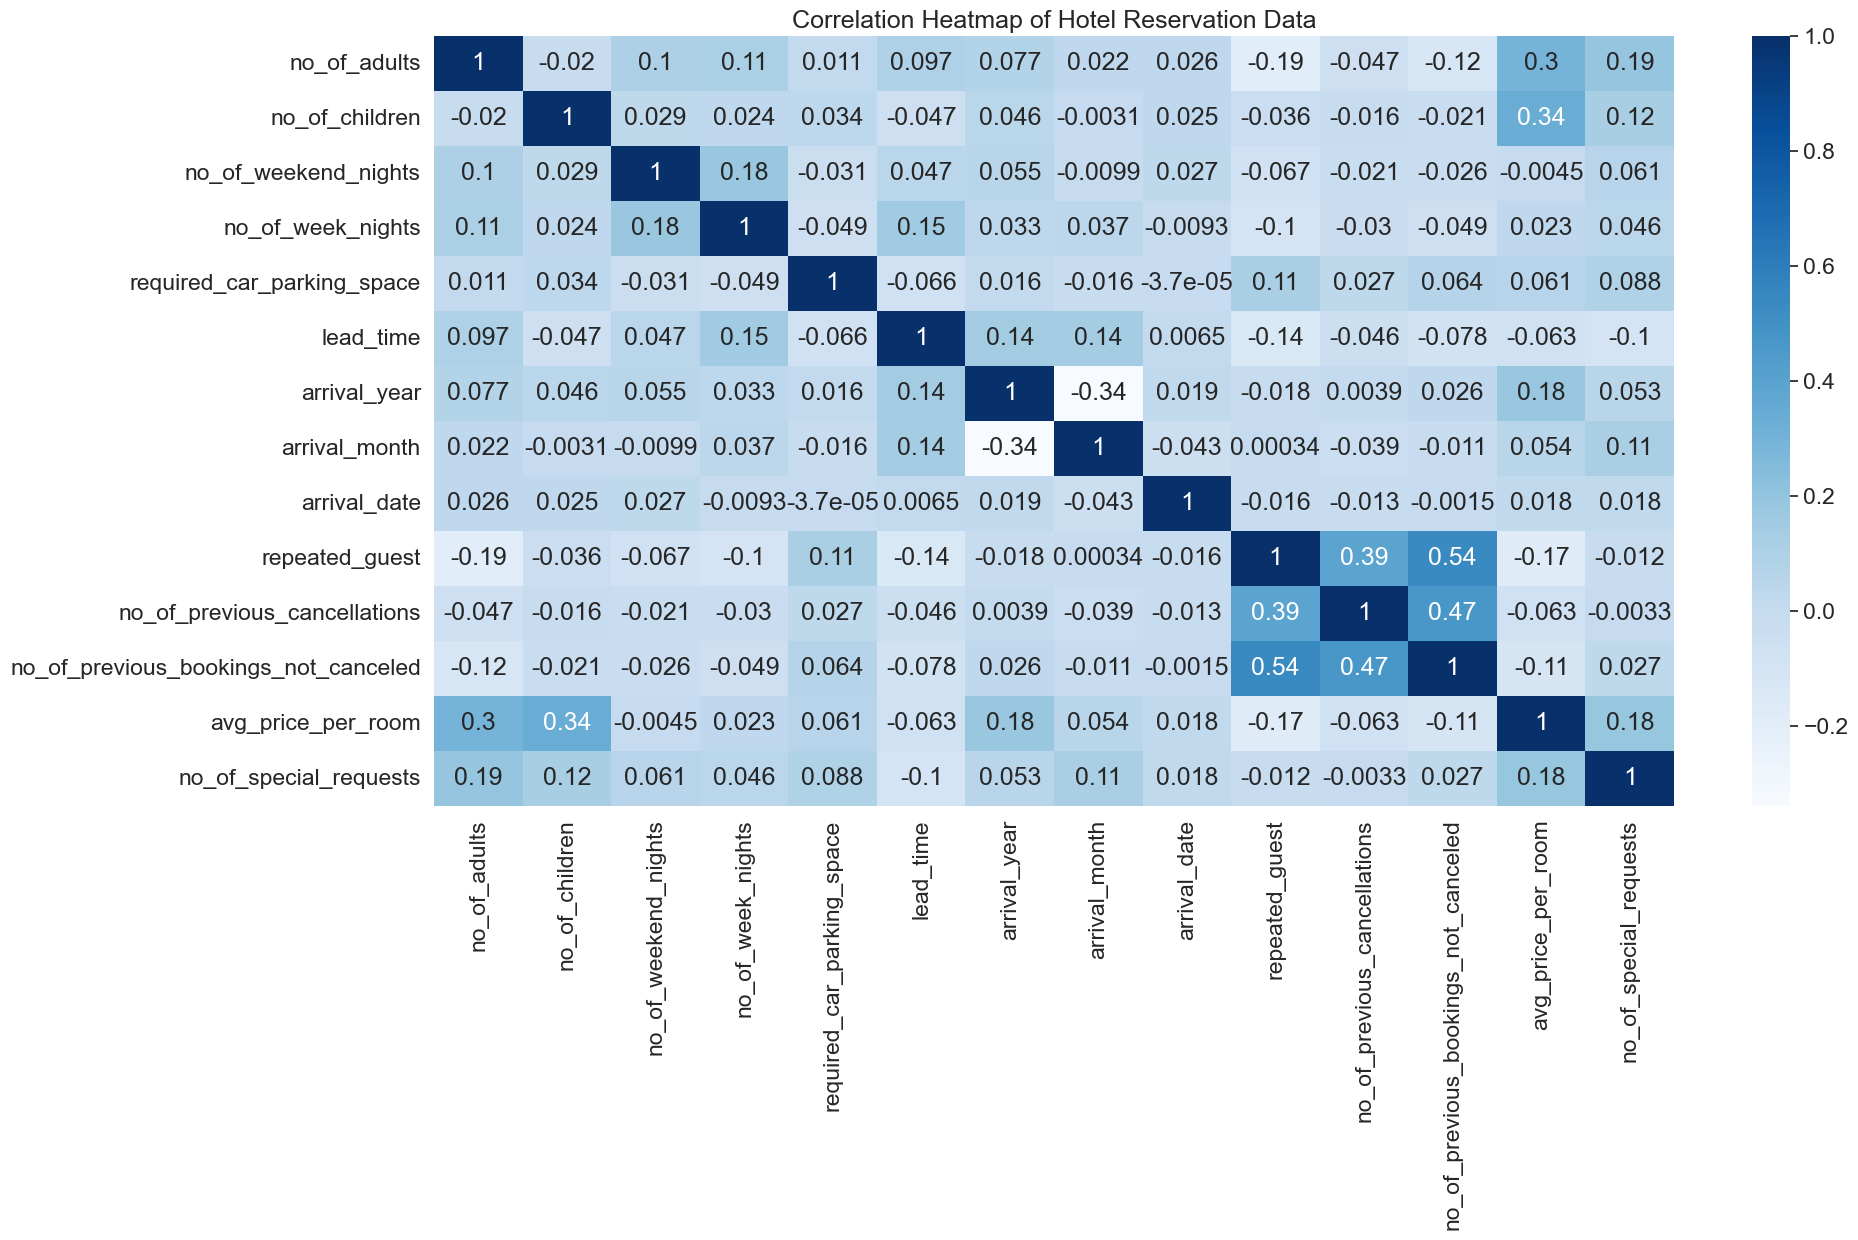

In [18]:
plt.figure(figsize=(20,10))
c=df.corr()
sns.heatmap(c, cmap="Blues",annot=True)
c
plt.title("Correlation Heatmap of Hotel Reservation Data")

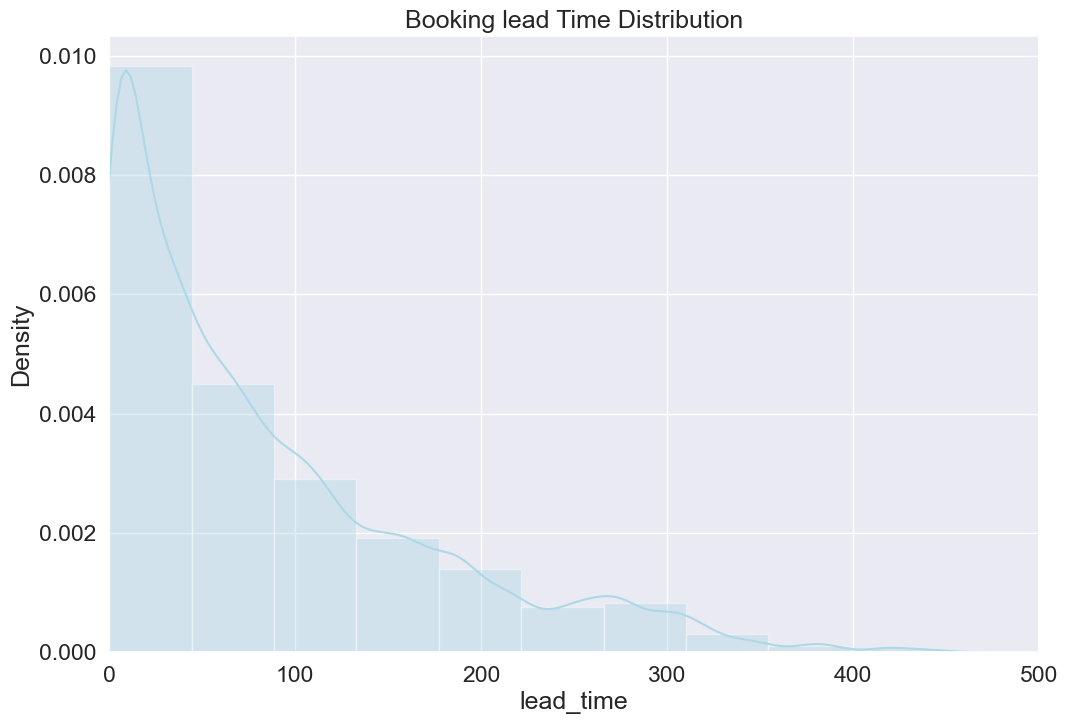

In [19]:
plt.figure(figsize=(12, 8))
sns.distplot(df["lead_time"], color="LightBlue", bins=10)
plt.title("Booking lead Time Distribution")
plt.xlim(0, 500)
plt.show()

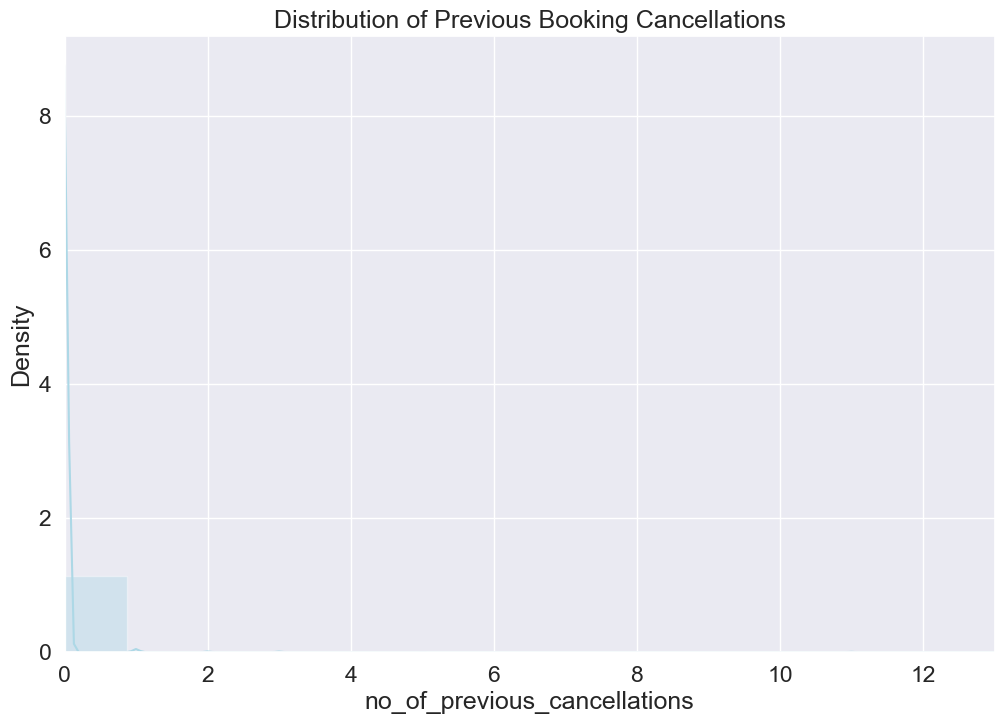

In [20]:
plt.figure(figsize=(12, 8))
sns.distplot(df["no_of_previous_cancellations"], color="LightBlue", bins=15)
plt.title("Distribution of Previous Booking Cancellations")
plt.xlim(0, 13)
plt.show()

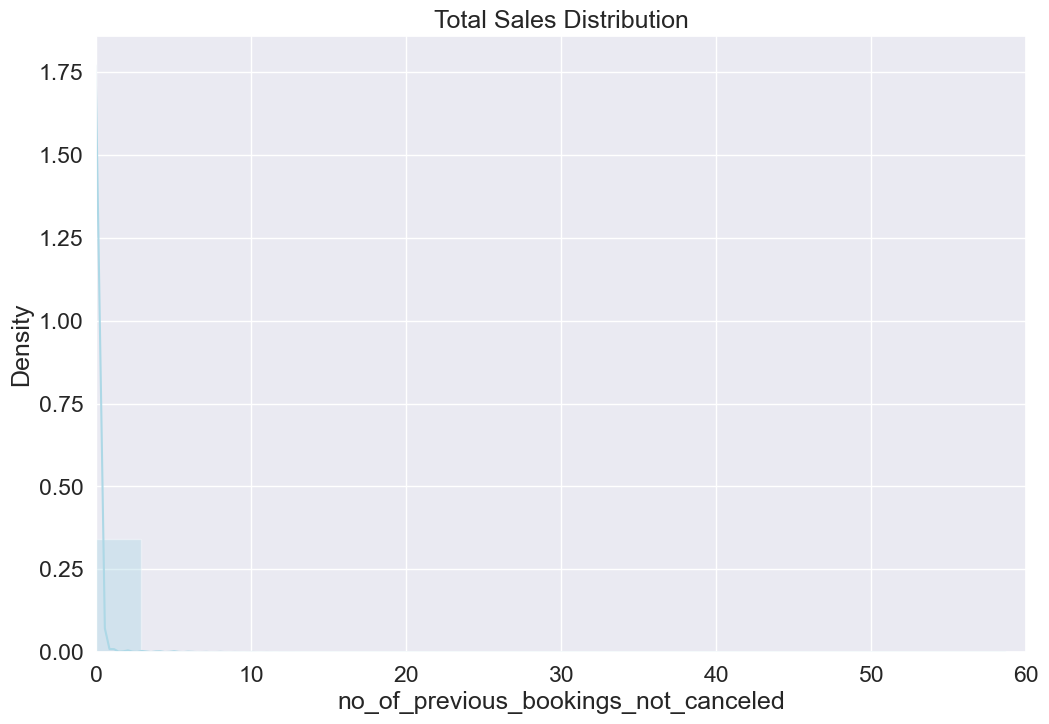

In [21]:
plt.figure(figsize=(12, 8))
sns.distplot(df["no_of_previous_bookings_not_canceled"], color="LightBlue", bins=20)
plt.title("Total Sales Distribution")
plt.xlim(0, 60)
plt.show()

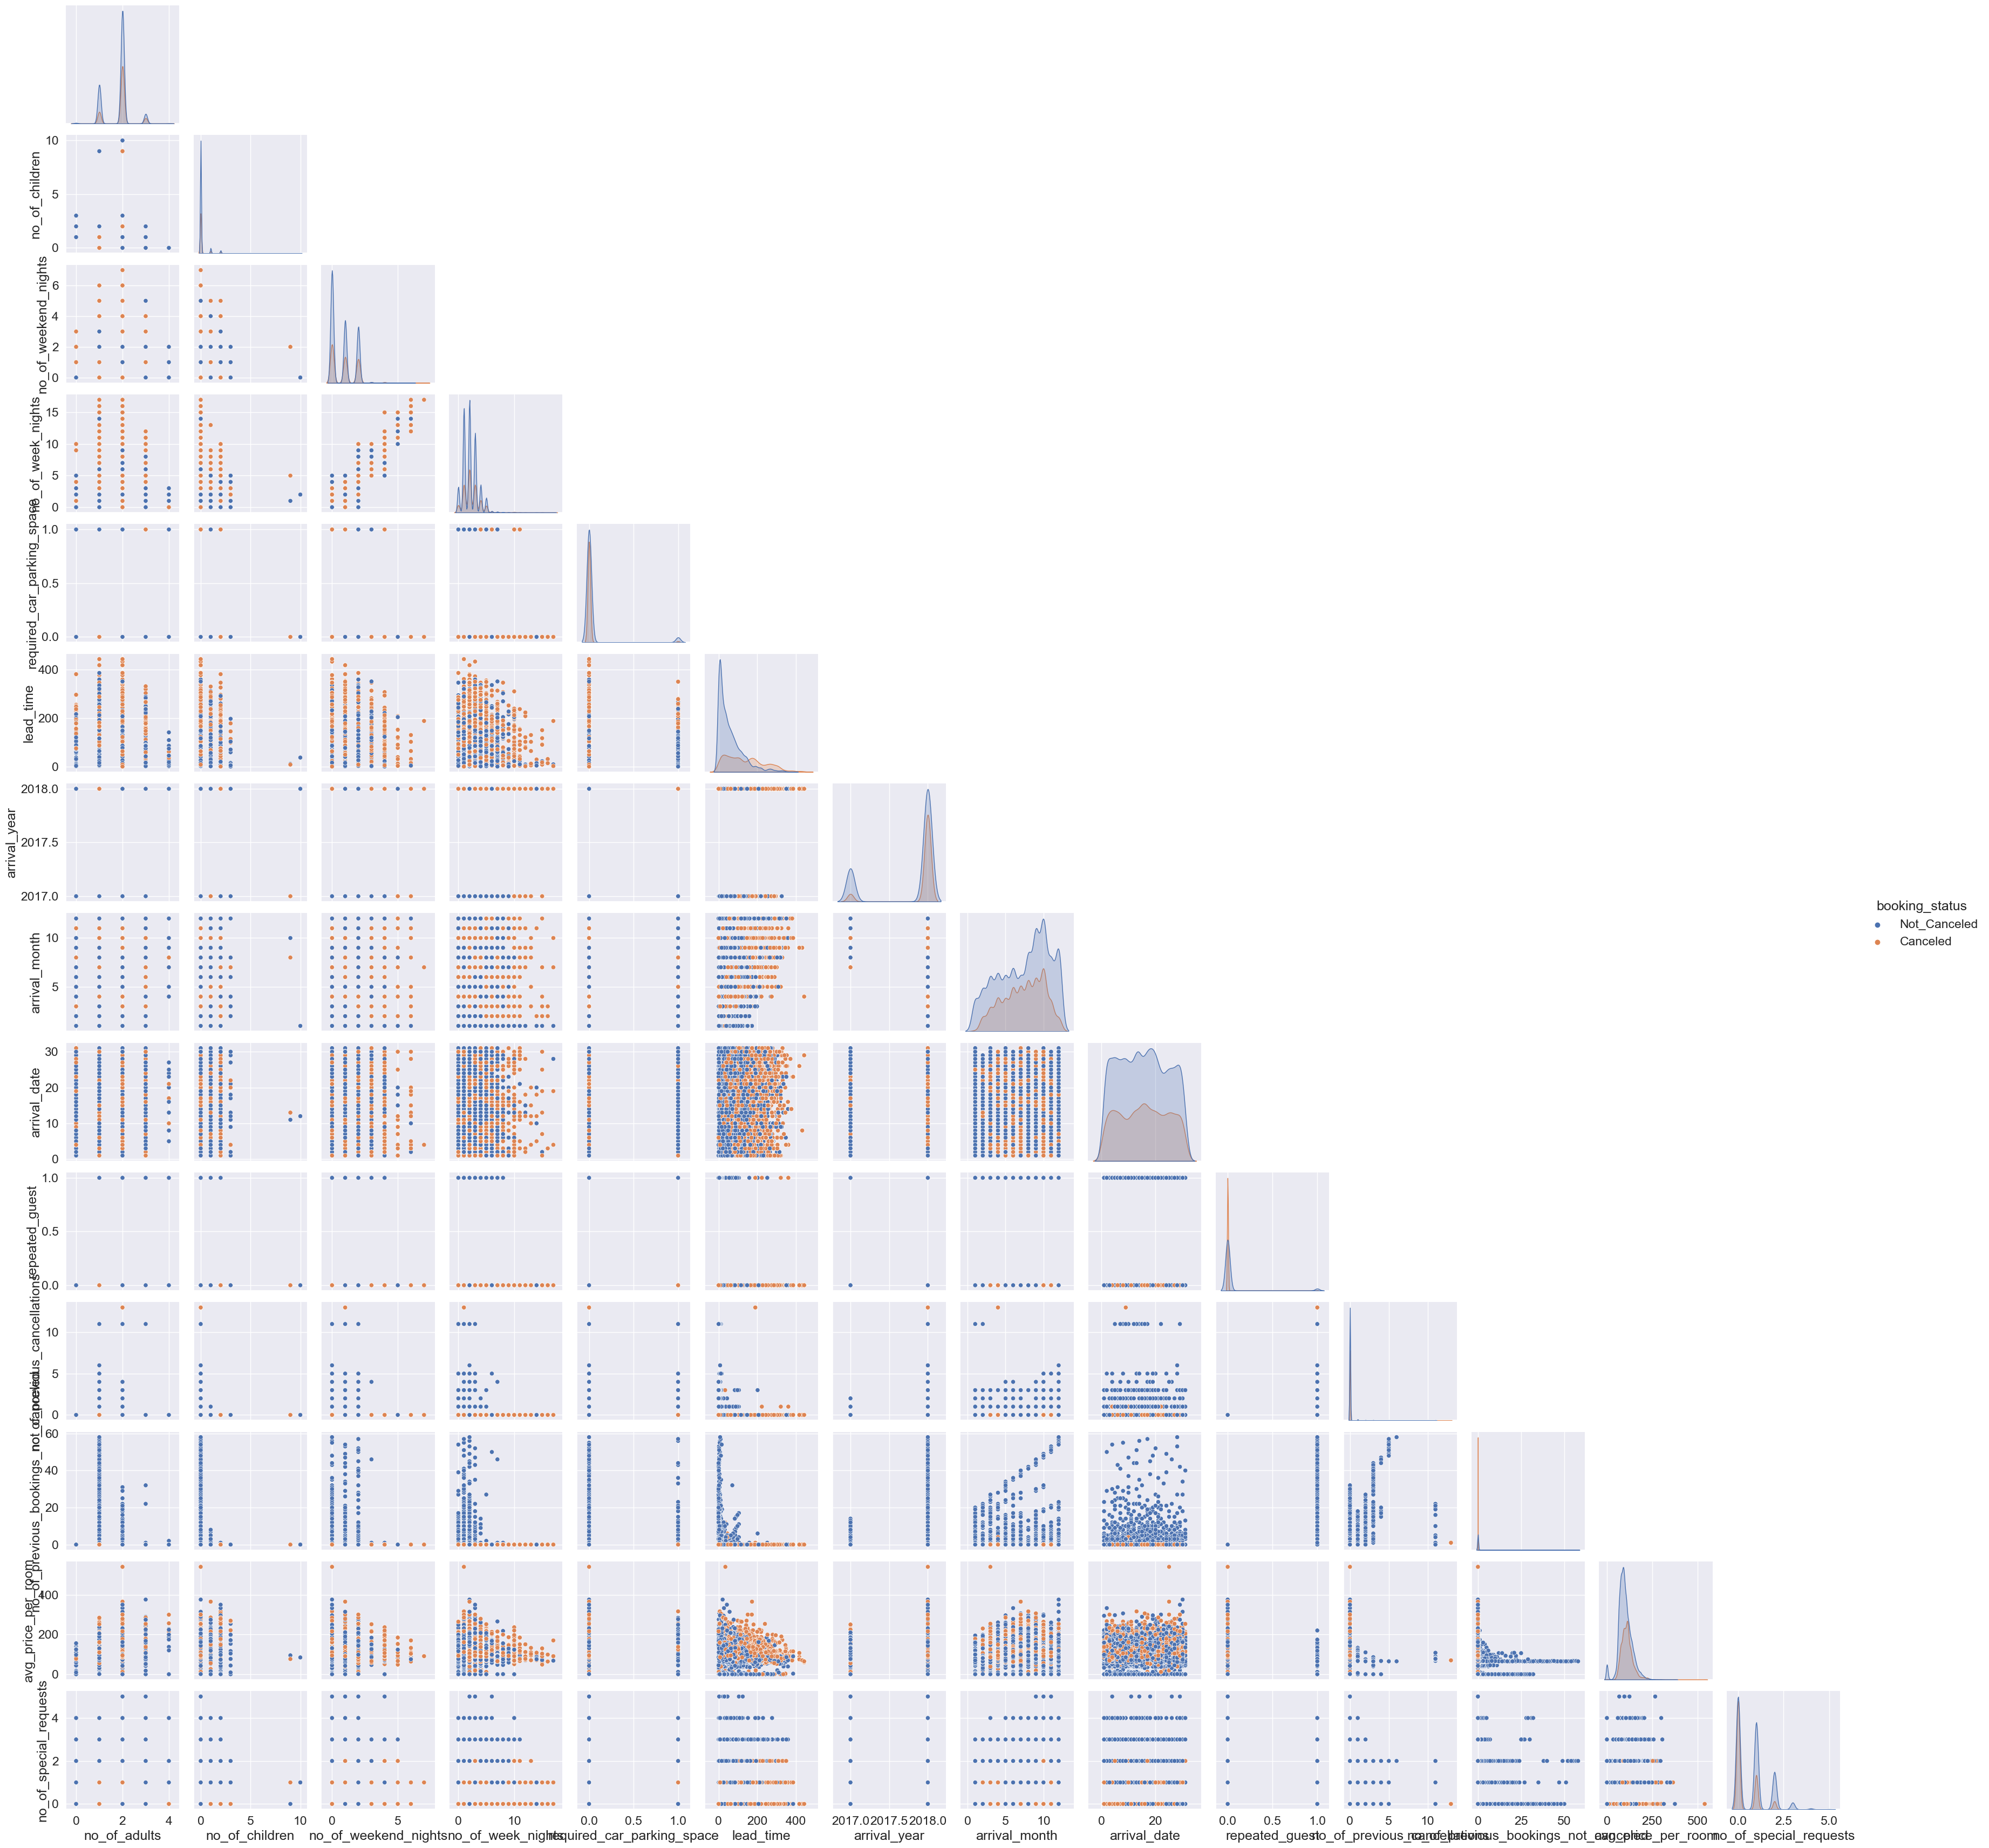

In [22]:
sns.pairplot(df, hue = "booking_status", corner=True)

In [23]:
df['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

Text(0, 0.5, 'Count')

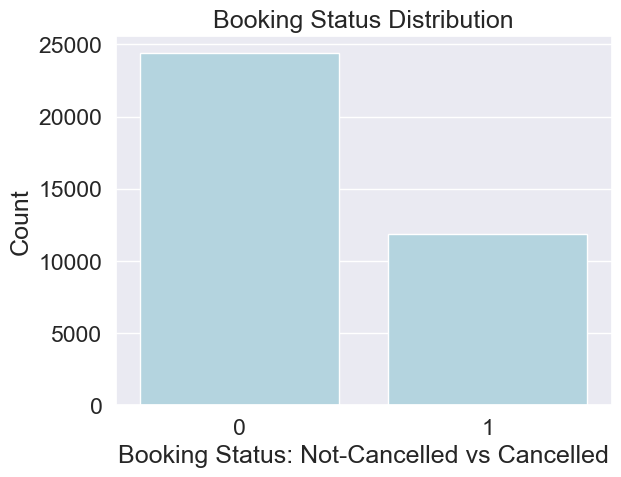

In [78]:
sns.countplot(x = "booking_status", data = df, color='LightBlue')
df.loc[:, "booking_status"].value_counts()
plt.title("Booking Status Distribution")
plt.xlabel('Booking Status: Not-Cancelled vs Cancelled')
plt.ylabel('Count')

In [25]:
#For the purpose of this model we need to change the 'Booking Status' feature from object to an integer
df['booking_status'] = df['booking_status'].replace({"Not_Canceled":0, "Canceled":1})

In [26]:
#Lets seperate the numeric features from the categorical features
num_df = df[["no_of_adults", "no_of_children", "no_of_weekend_nights", "no_of_week_nights", "required_car_parking_space", "lead_time", "arrival_year", "arrival_month", "arrival_date", "repeated_guest", "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled", "avg_price_per_room", "no_of_special_requests", "booking_status"]]

In [27]:
#We'll need to change the 'Average Price Per Room' feature from float64 to integer
num_df['avg_price_per_room'] = num_df['avg_price_per_room'].astype(int)

In [28]:
#Lets seperate the categorical features from the numeric features
cat_df = df[["type_of_meal_plan", "room_type_reserved", "market_segment_type"]]

In [29]:
num_df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0         48          2018              4   

   arrival_date  repeated_guest  no_of_previous_cancellations  \
0             2               0                             0   
1             6               0                             0   
2            28               0                             0   
3            20               0                             0   
4            11               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0                  65   
1                                     0                 106   
2                                     0                  60   
3                                     0                 100   
4                                     0                  94   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
2                       0               1  
3                       0               1  
4                       0               1

In [30]:
cat_df.head()

type_of_meal_plan room_type_reserved market_segment_type
0       Meal Plan 1        Room_Type 1             Offline
1      Not Selected        Room_Type 1              Online
2       Meal Plan 1        Room_Type 1              Online
3       Meal Plan 1        Room_Type 1              Online
4      Not Selected        Room_Type 1              Online

In [31]:
num_df.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.157298  35.066193     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   
booking_status                        36275.0     0.327636   0.469358     0.0   

                                         25%     50%     75%     max  
no_of_adults                             2.0     2.0     2.0     4.0  
no_of_children                           0.0     0.0     0.0    10.0  
no_of_weekend_nights                     0.0     1.0     2.0     7.0  
no_of_week_nights                        1.0     2.0     3.0    17.0  
required_car_parking_space               0.0     0.0     0.0     1.0  
lead_time                               17.0    57.0   126.0   443.0  
arrival_year                          2018.0  2018.0  2018.0  2018.0  
arrival_month                            5.0     8.0    10.0    12.0  
arrival_date                             8.0    16.0    23.0    31.0  
repeated_guest                           0.0     0.0     0.0     1.0  
no_of_previous_cancellations             0.0     0.0     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.0     0.0    58.0  
avg_price_per_room                      80.0    99.0   120.0   540.0  
no_of_special_requests                   0.0     0.0     1.0     5.0  
booking_status                           0.0     0.0     1.0     1.0

Text(0.5, 1.0, 'Correlation Heatmap of Numeric Hotel Reservation Data')

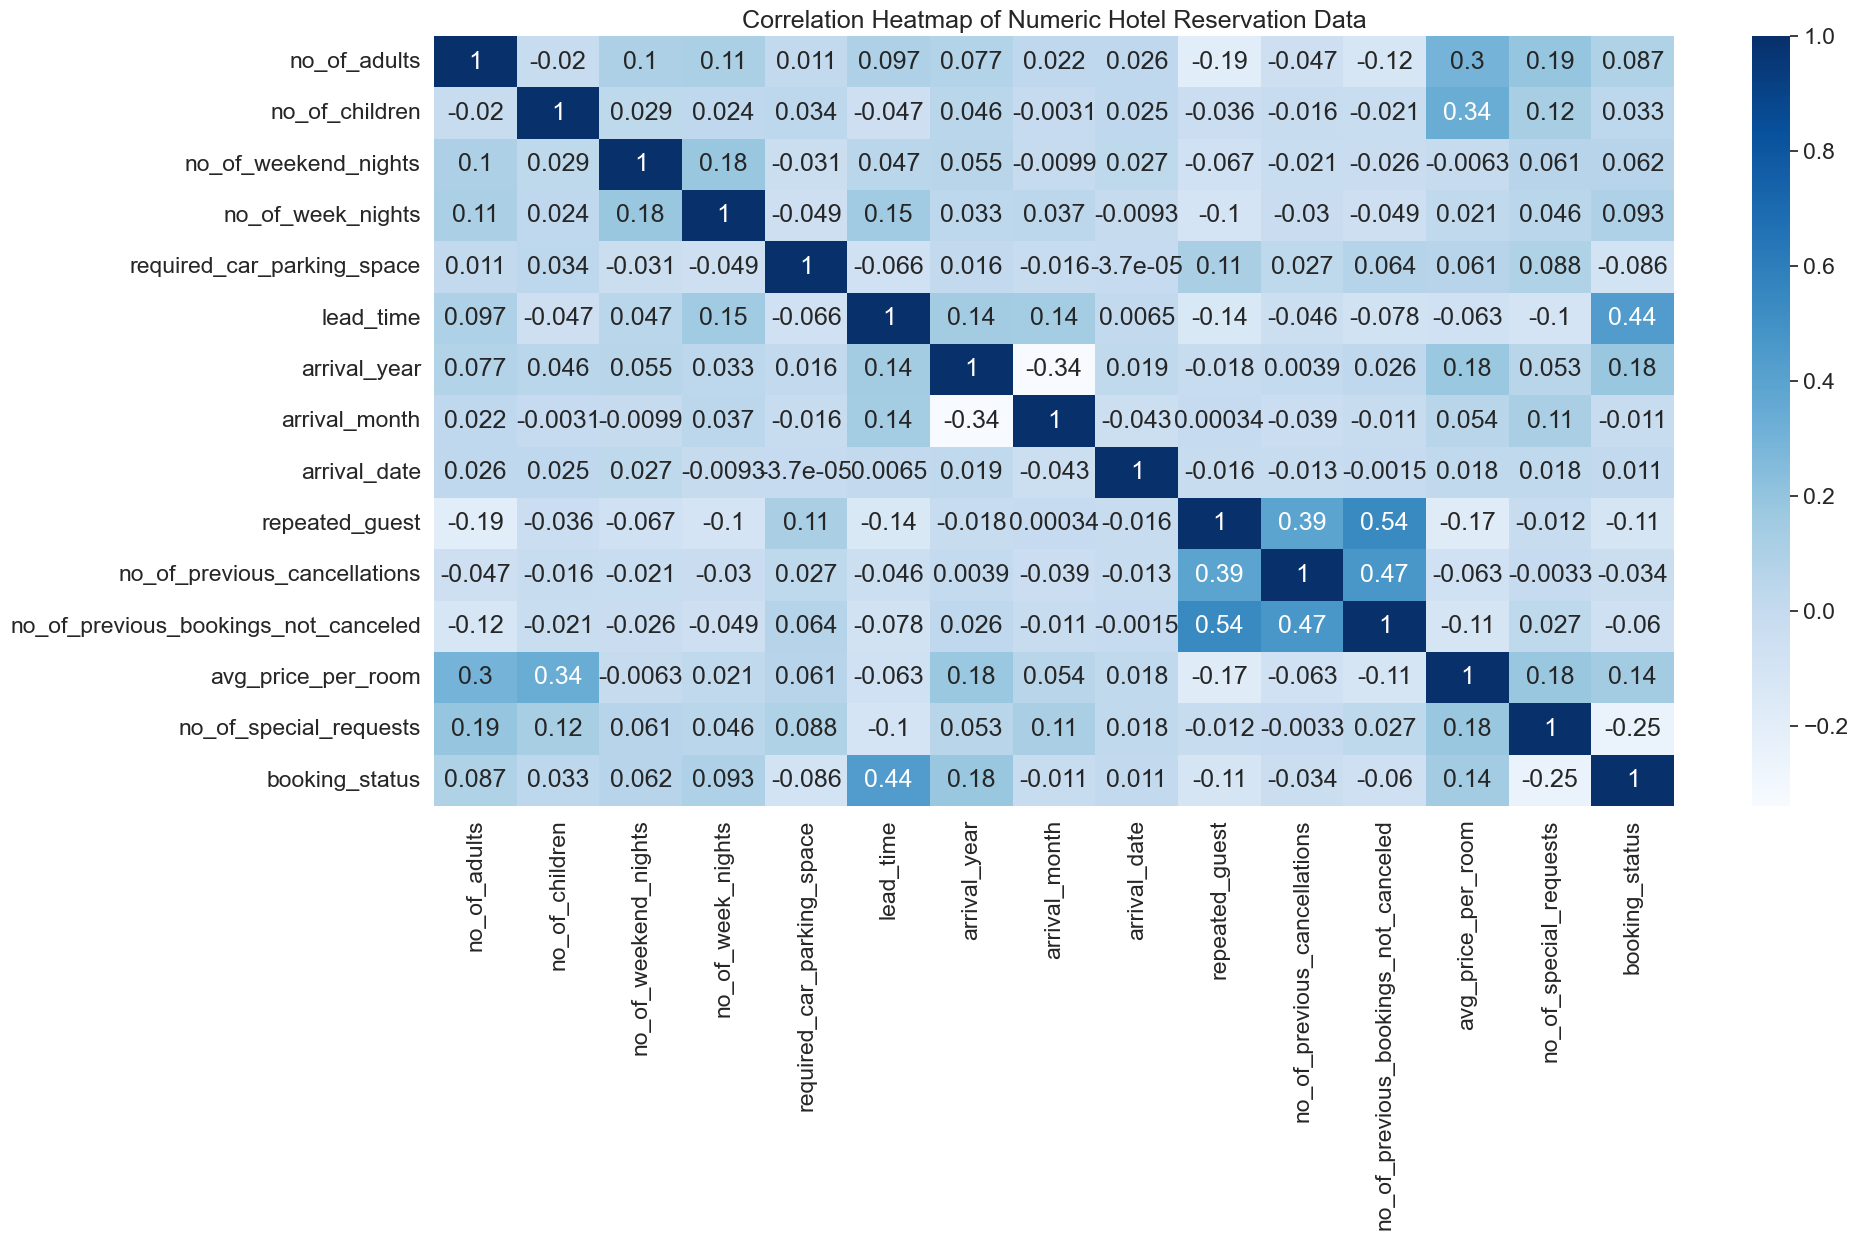

In [32]:
plt.figure(figsize=(20,10))
c=num_df.corr()
sns.heatmap(c, cmap="Blues",annot=True)
c
plt.title("Correlation Heatmap of Numeric Hotel Reservation Data")

In [33]:
#We'll drop the numeric columns with a low correlation with our target variable 'Booking Status'
num_df.drop(columns=["arrival_date",],inplace=True)

In [34]:
num_df.drop(columns=["arrival_month",],inplace=True)

In [35]:
#Lets viualise the differences between the Booking Status' of some of the numeric features - <strong correlations>
#Not Canceled = 0, Canceled = 1

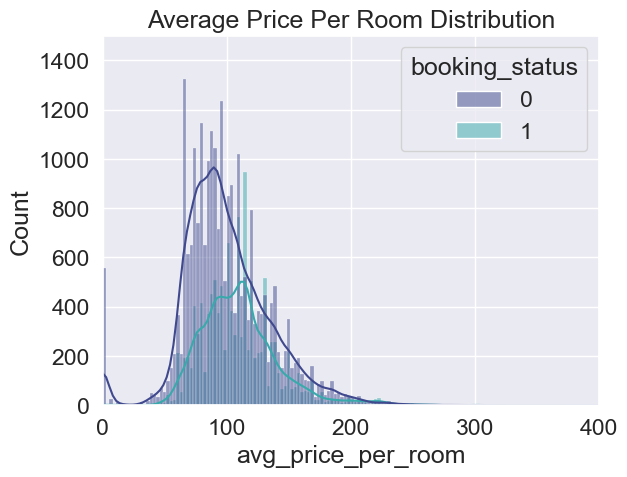

In [36]:
sns.histplot(x="avg_price_per_room", hue="booking_status", data=num_df, kde=True, palette="mako",bins=200)
plt.ylim(0,1500)
plt.xlim(0,400)
plt.title("Average Price Per Room Distribution");

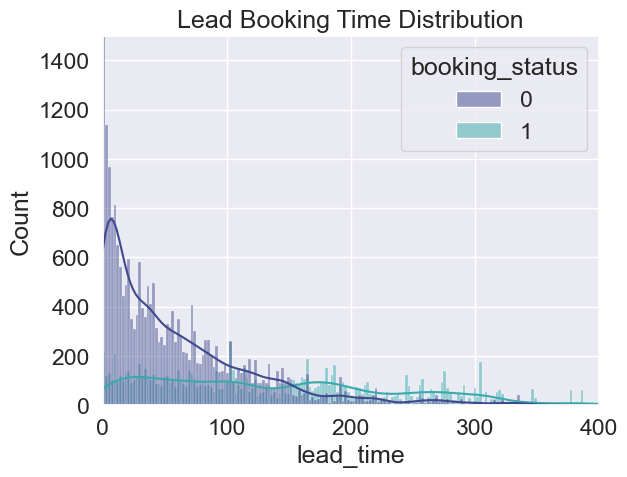

In [37]:
sns.histplot(x="lead_time", hue="booking_status", data=num_df, kde=True, palette="mako",bins=200)
plt.ylim(0,1500)
plt.xlim(0,400)
plt.title("Lead Booking Time Distribution");

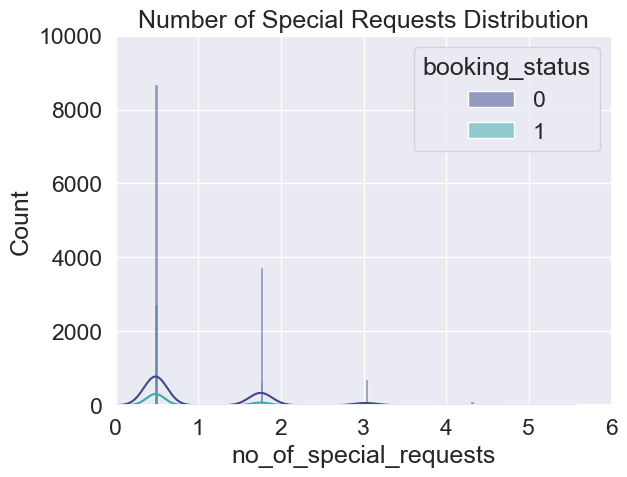

In [85]:
sns.histplot(x="no_of_special_requests", hue="booking_status", data=num_df, kde=True, palette="mako",bins=200)
plt.ylim(0,10000)
plt.xlim(0,6)
plt.title("Number of Special Requests Distribution");

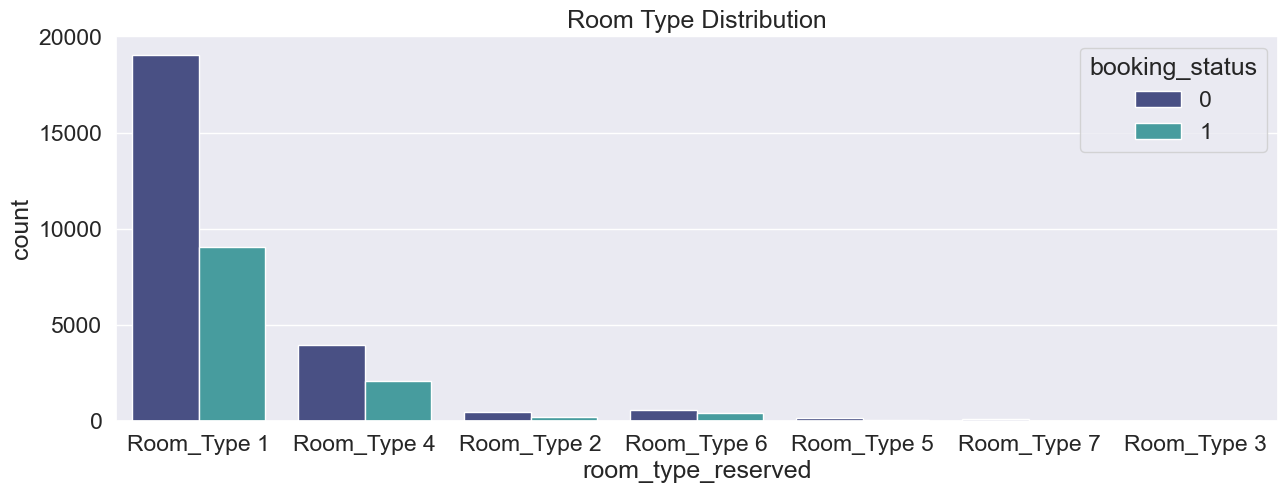

In [38]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x='room_type_reserved', hue="booking_status", data=df, palette="mako")
plt.title(f"Room Type Distribution")
plt.show()

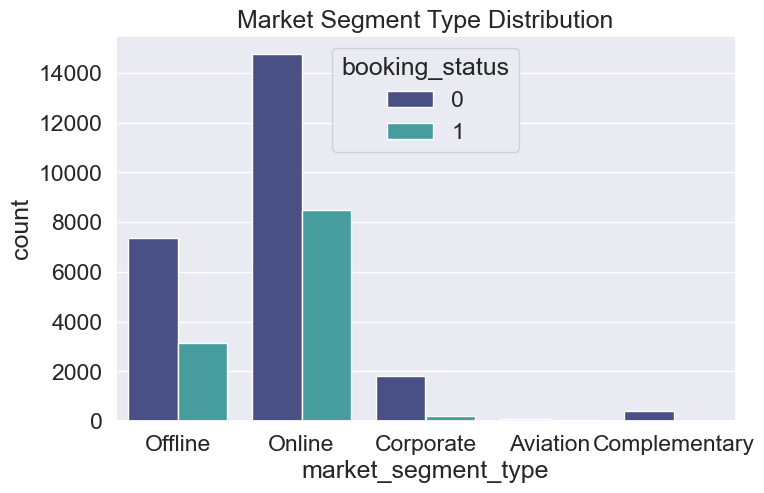

In [39]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x='market_segment_type', hue="booking_status", data=df, palette="mako")
plt.title(f"Market Segment Type Distribution")
plt.show()

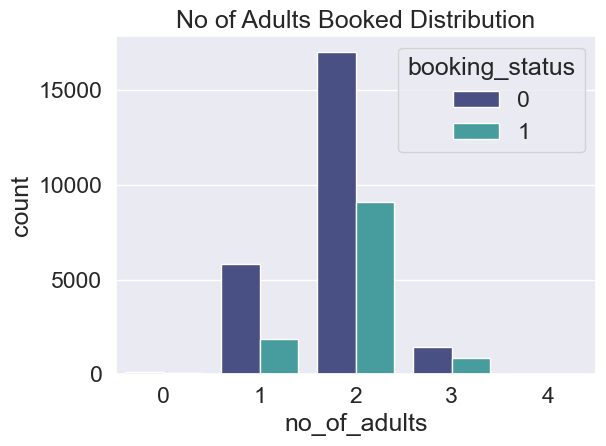

In [40]:
sns.countplot(x='no_of_adults', hue="booking_status", data=df, palette="mako")
plt.title(f"No of Adults Booked Distribution")
plt.tight_layout()

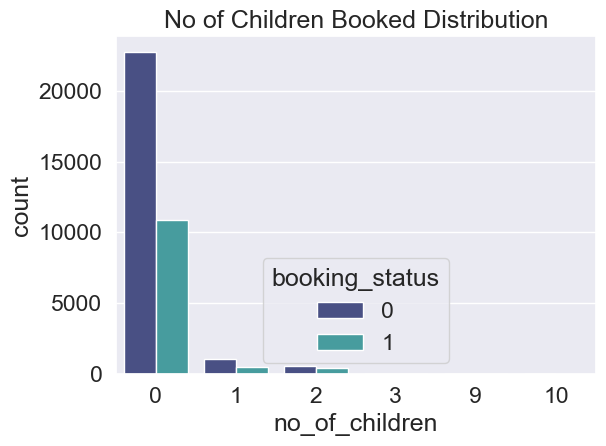

In [41]:
sns.countplot(x='no_of_children', hue="booking_status", data=df, palette="mako")
plt.title(f"No of Children Booked Distribution")
plt.tight_layout()

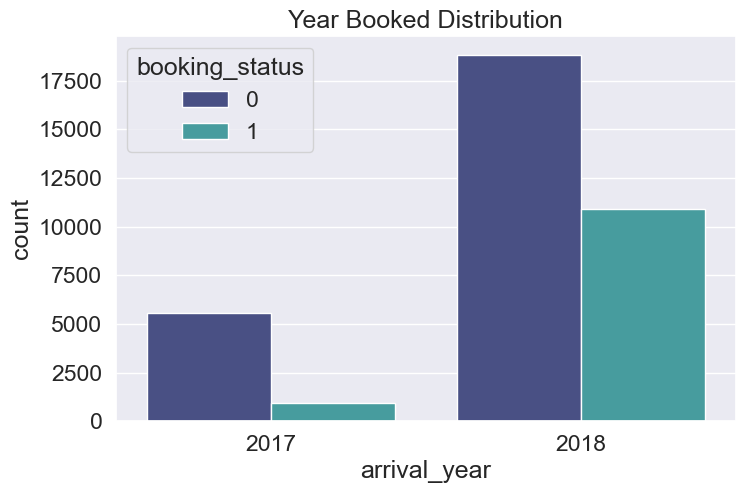

In [42]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x='arrival_year', hue="booking_status", data=df, palette="mako")
plt.title(f"Year Booked Distribution")
plt.show()

In [43]:
#As there are only 2 years featured (2017 and 2018) we will drop this feature (it also has one of the lowest correlations)
num_df.drop(columns=["arrival_year",],inplace=True)

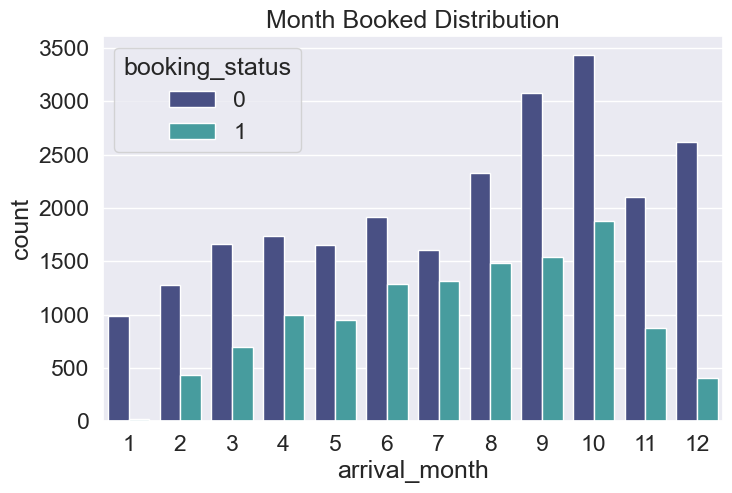

In [44]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x='arrival_month', hue="booking_status", data=df, palette="mako")
plt.title(f"Month Booked Distribution")
plt.show()

In [45]:
#Feature Engineering

In [46]:
#As the features 'no_of_adults' and 'no_of_children' are similar in correlation we'll combine them to reduce the number of features we'll be  using in our model

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(n_components=1)
num_df["no_of_guests"] = pca.fit_transform(num_df[["no_of_adults","no_of_children"]])
num_df.drop(columns=["no_of_adults","no_of_children"],inplace=True)

In [49]:
#as 'no_of_week_nights' and 'no_of_weekend_nights' are similar in correlation we'll also combine these features too

In [50]:
num_df["no_of_week_days"] = pca.fit_transform(num_df[["no_of_weekend_nights","no_of_week_nights"]])
num_df.drop(columns=["no_of_weekend_nights","no_of_week_nights"],inplace=True)

In [51]:
num_df.head()

required_car_parking_space  lead_time  repeated_guest  \
0                           0        224               0   
1                           0          5               0   
2                           0          1               0   
3                           0        211               0   
4                           0         48               0   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             0                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   

   avg_price_per_room  no_of_special_requests  booking_status  no_of_guests  \
0                  65                       0               0      0.158982   
1                 106                       1               0      0.158982   
2                  60                       0               1     -0.840274   
3                 100                       0               1      0.158982   
4                  94                       0               1      0.158982   

   no_of_week_days  
0        -0.168923  
1         0.987358  
2        -0.983180  
3        -0.339934  
4        -1.154192

Text(0.5, 1.0, 'Correlation Heatmap of Numeric Hotel Reservation Data')

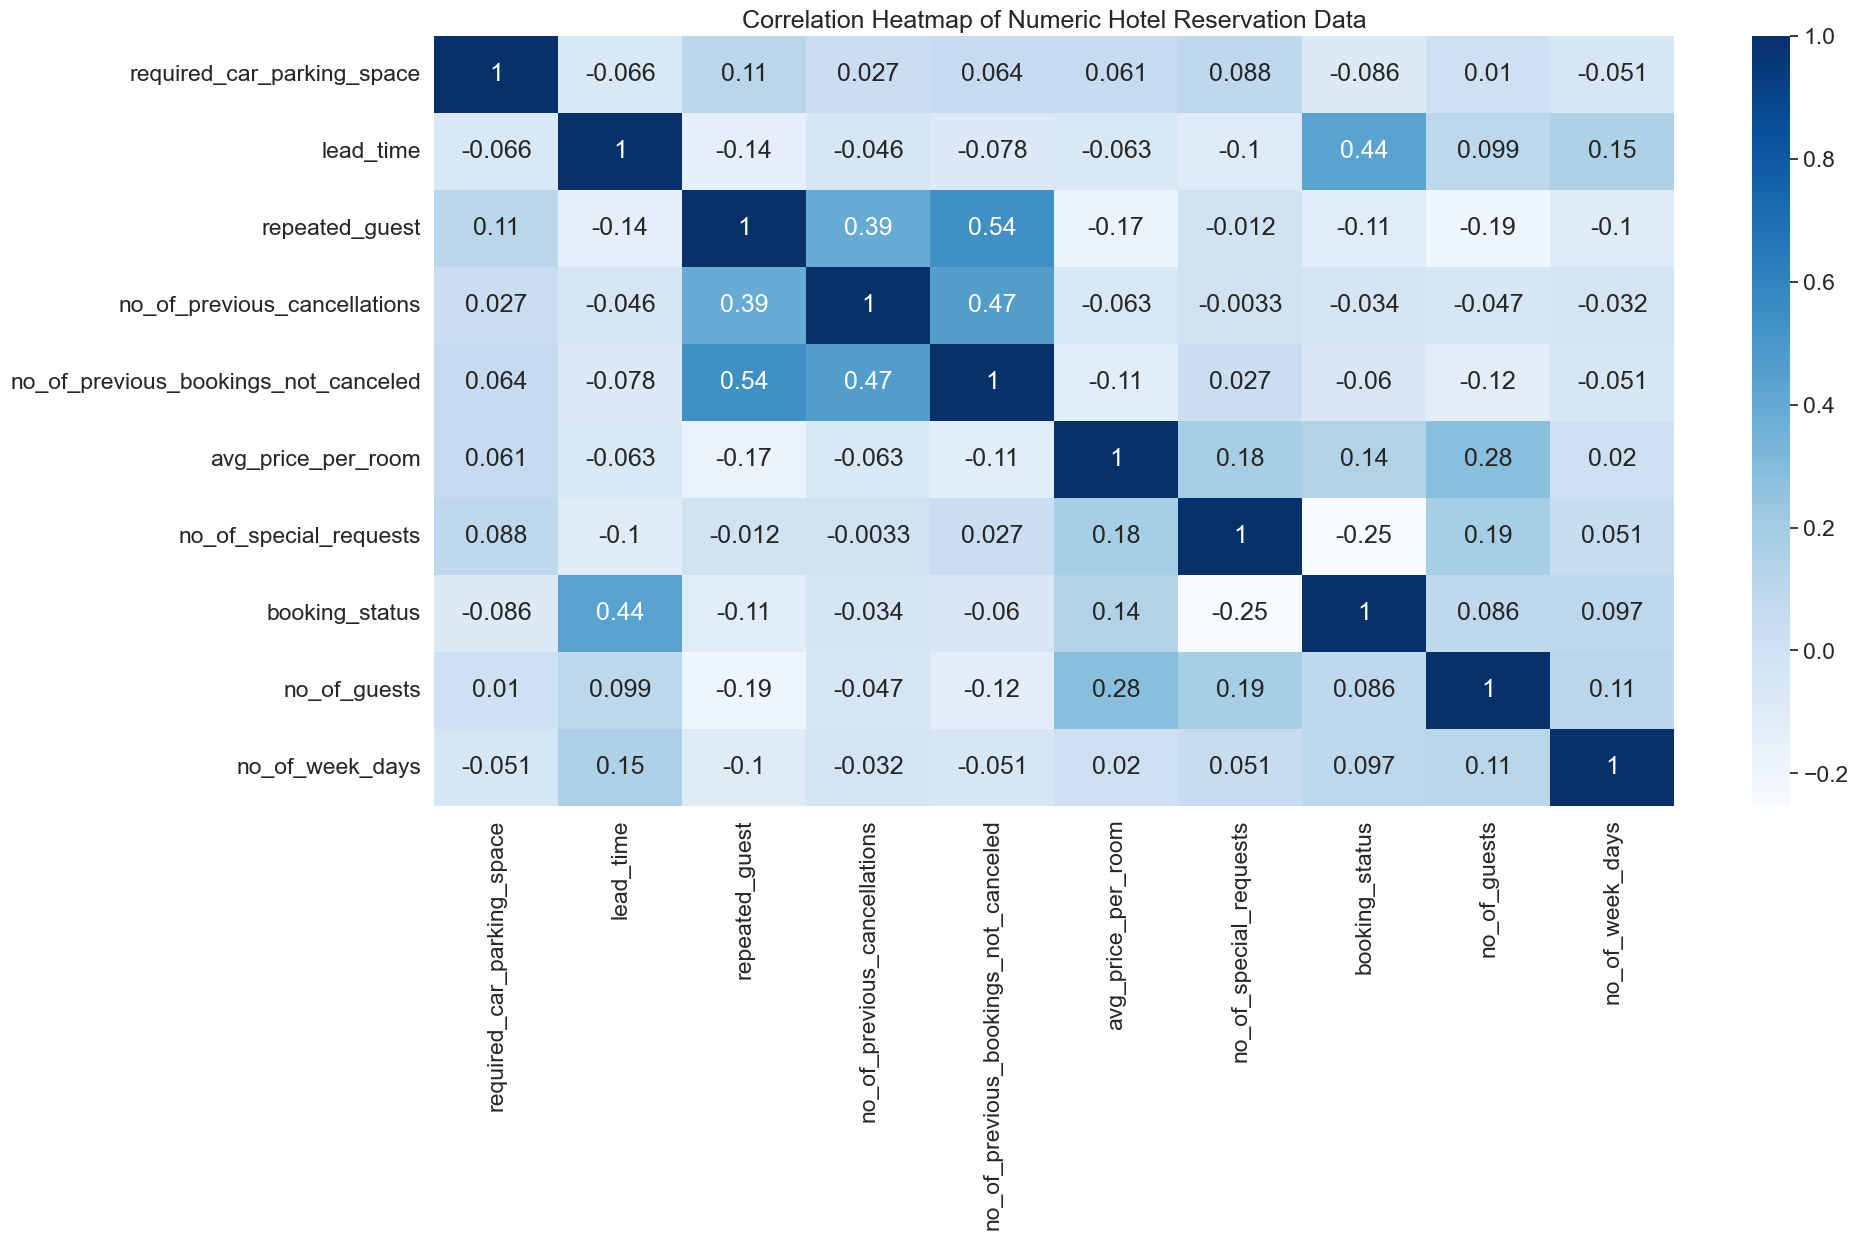

In [52]:
plt.figure(figsize=(20,10))
n=num_df.corr()
sns.heatmap(n, cmap="Blues",annot=True)
n
plt.title("Correlation Heatmap of Numeric Hotel Reservation Data")

In [53]:
#We'll now scale the data for model

In [54]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
num_df[["required_car_parking_space", "lead_time", "repeated_guest", "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled", "avg_price_per_room", "no_of_special_requests", "no_of_guests", "no_of_week_days"]] = scale.fit_transform(num_df[["required_car_parking_space", "lead_time", "repeated_guest", "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled", "avg_price_per_room", "no_of_special_requests", "no_of_guests", "no_of_week_days"]])

In [55]:
num_df.head()

required_car_parking_space  lead_time  repeated_guest  \
0                   -0.178819   1.614896        -0.16221   
1                   -0.178819  -0.933701        -0.16221   
2                   -0.178819  -0.980250        -0.16221   
3                   -0.178819   1.463610        -0.16221   
4                   -0.178819  -0.433291        -0.16221   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                     -0.063393                             -0.087456   
1                     -0.063393                             -0.087456   
2                     -0.063393                             -0.087456   
3                     -0.063393                             -0.087456   
4                     -0.063393                             -0.087456   

   avg_price_per_room  no_of_special_requests  booking_status  no_of_guests  \
0           -1.088166                -0.78814               0      0.306406   
1            0.081068                 0.48376               0      0.306406   
2           -1.230755                -0.78814               1     -1.619458   
3           -0.090039                -0.78814               1      0.306406   
4           -0.261147                -0.78814               1      0.306406   

   no_of_week_days  
0        -0.118593  
1         0.693180  
2        -0.690247  
3        -0.238652  
4        -0.810306

In [56]:
#let's transform the categorical data into numeric data so that it can also be used in the model

In [57]:
cat_df.head()

type_of_meal_plan room_type_reserved market_segment_type
0       Meal Plan 1        Room_Type 1             Offline
1      Not Selected        Room_Type 1              Online
2       Meal Plan 1        Room_Type 1              Online
3       Meal Plan 1        Room_Type 1              Online
4      Not Selected        Room_Type 1              Online

In [58]:
cat_df = pd.get_dummies(cat_df,columns=["type_of_meal_plan","room_type_reserved","market_segment_type"])

In [59]:
cat_df.head()

type_of_meal_plan_Meal Plan 1  type_of_meal_plan_Meal Plan 2  \
0                              1                              0   
1                              0                              0   
2                              1                              0   
3                              1                              0   
4                              0                              0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                              0                               0   
1                              0                               1   
2                              0                               0   
3                              0                               0   
4                              0                               1   

   room_type_reserved_Room_Type 1  room_type_reserved_Room_Type 2  \
0                               1                               0   
1                               1                               0   
2                               1                               0   
3                               1                               0   
4                               1                               0   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 7  market_segment_type_Aviation  \
0                               0                             0   
1                               0                             0   
2                               0                             0   
3                               0                             0   
4                               0                             0   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                                  0                              0   
1                                  0                              0   
2                                  0                              0   
3                                  0                              0   
4                                  0                              0   

   market_segment_type_Offline  market_segment_type_Online  
0                            1                           0  
1                            0                           1  
2                            0                           1  
3                            0                           1  
4                            0                           1

In [60]:
#lets merge the numeric data and categorical data back into the same dataframe

In [61]:
df_model = pd.merge(num_df, cat_df, left_index=True, right_index=True, how='outer')
df_model.head()

required_car_parking_space  lead_time  repeated_guest  \
0                   -0.178819   1.614896        -0.16221   
1                   -0.178819  -0.933701        -0.16221   
2                   -0.178819  -0.980250        -0.16221   
3                   -0.178819   1.463610        -0.16221   
4                   -0.178819  -0.433291        -0.16221   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                     -0.063393                             -0.087456   
1                     -0.063393                             -0.087456   
2                     -0.063393                             -0.087456   
3                     -0.063393                             -0.087456   
4                     -0.063393                             -0.087456   

   avg_price_per_room  no_of_special_requests  booking_status  no_of_guests  \
0           -1.088166                -0.78814               0      0.306406   
1            0.081068                 0.48376               0      0.306406   
2           -1.230755                -0.78814               1     -1.619458   
3           -0.090039                -0.78814               1      0.306406   
4           -0.261147                -0.78814               1      0.306406   

   no_of_week_days  type_of_meal_plan_Meal Plan 1  \
0        -0.118593                              1   
1         0.693180                              0   
2        -0.690247                              1   
3        -0.238652                              1   
4        -0.810306                              0   

   type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 1  \
0                               0                               1   
1                               1                               1   
2                               0                               1   
3                               0                               1   
4                               1                               1   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   market_segment_type_Aviation  market_segment_type_Complementary  \
0                             0                                  0   
1                             0                                  0   
2                             0                                  0   
3                             0                                  0

<AxesSubplot:>

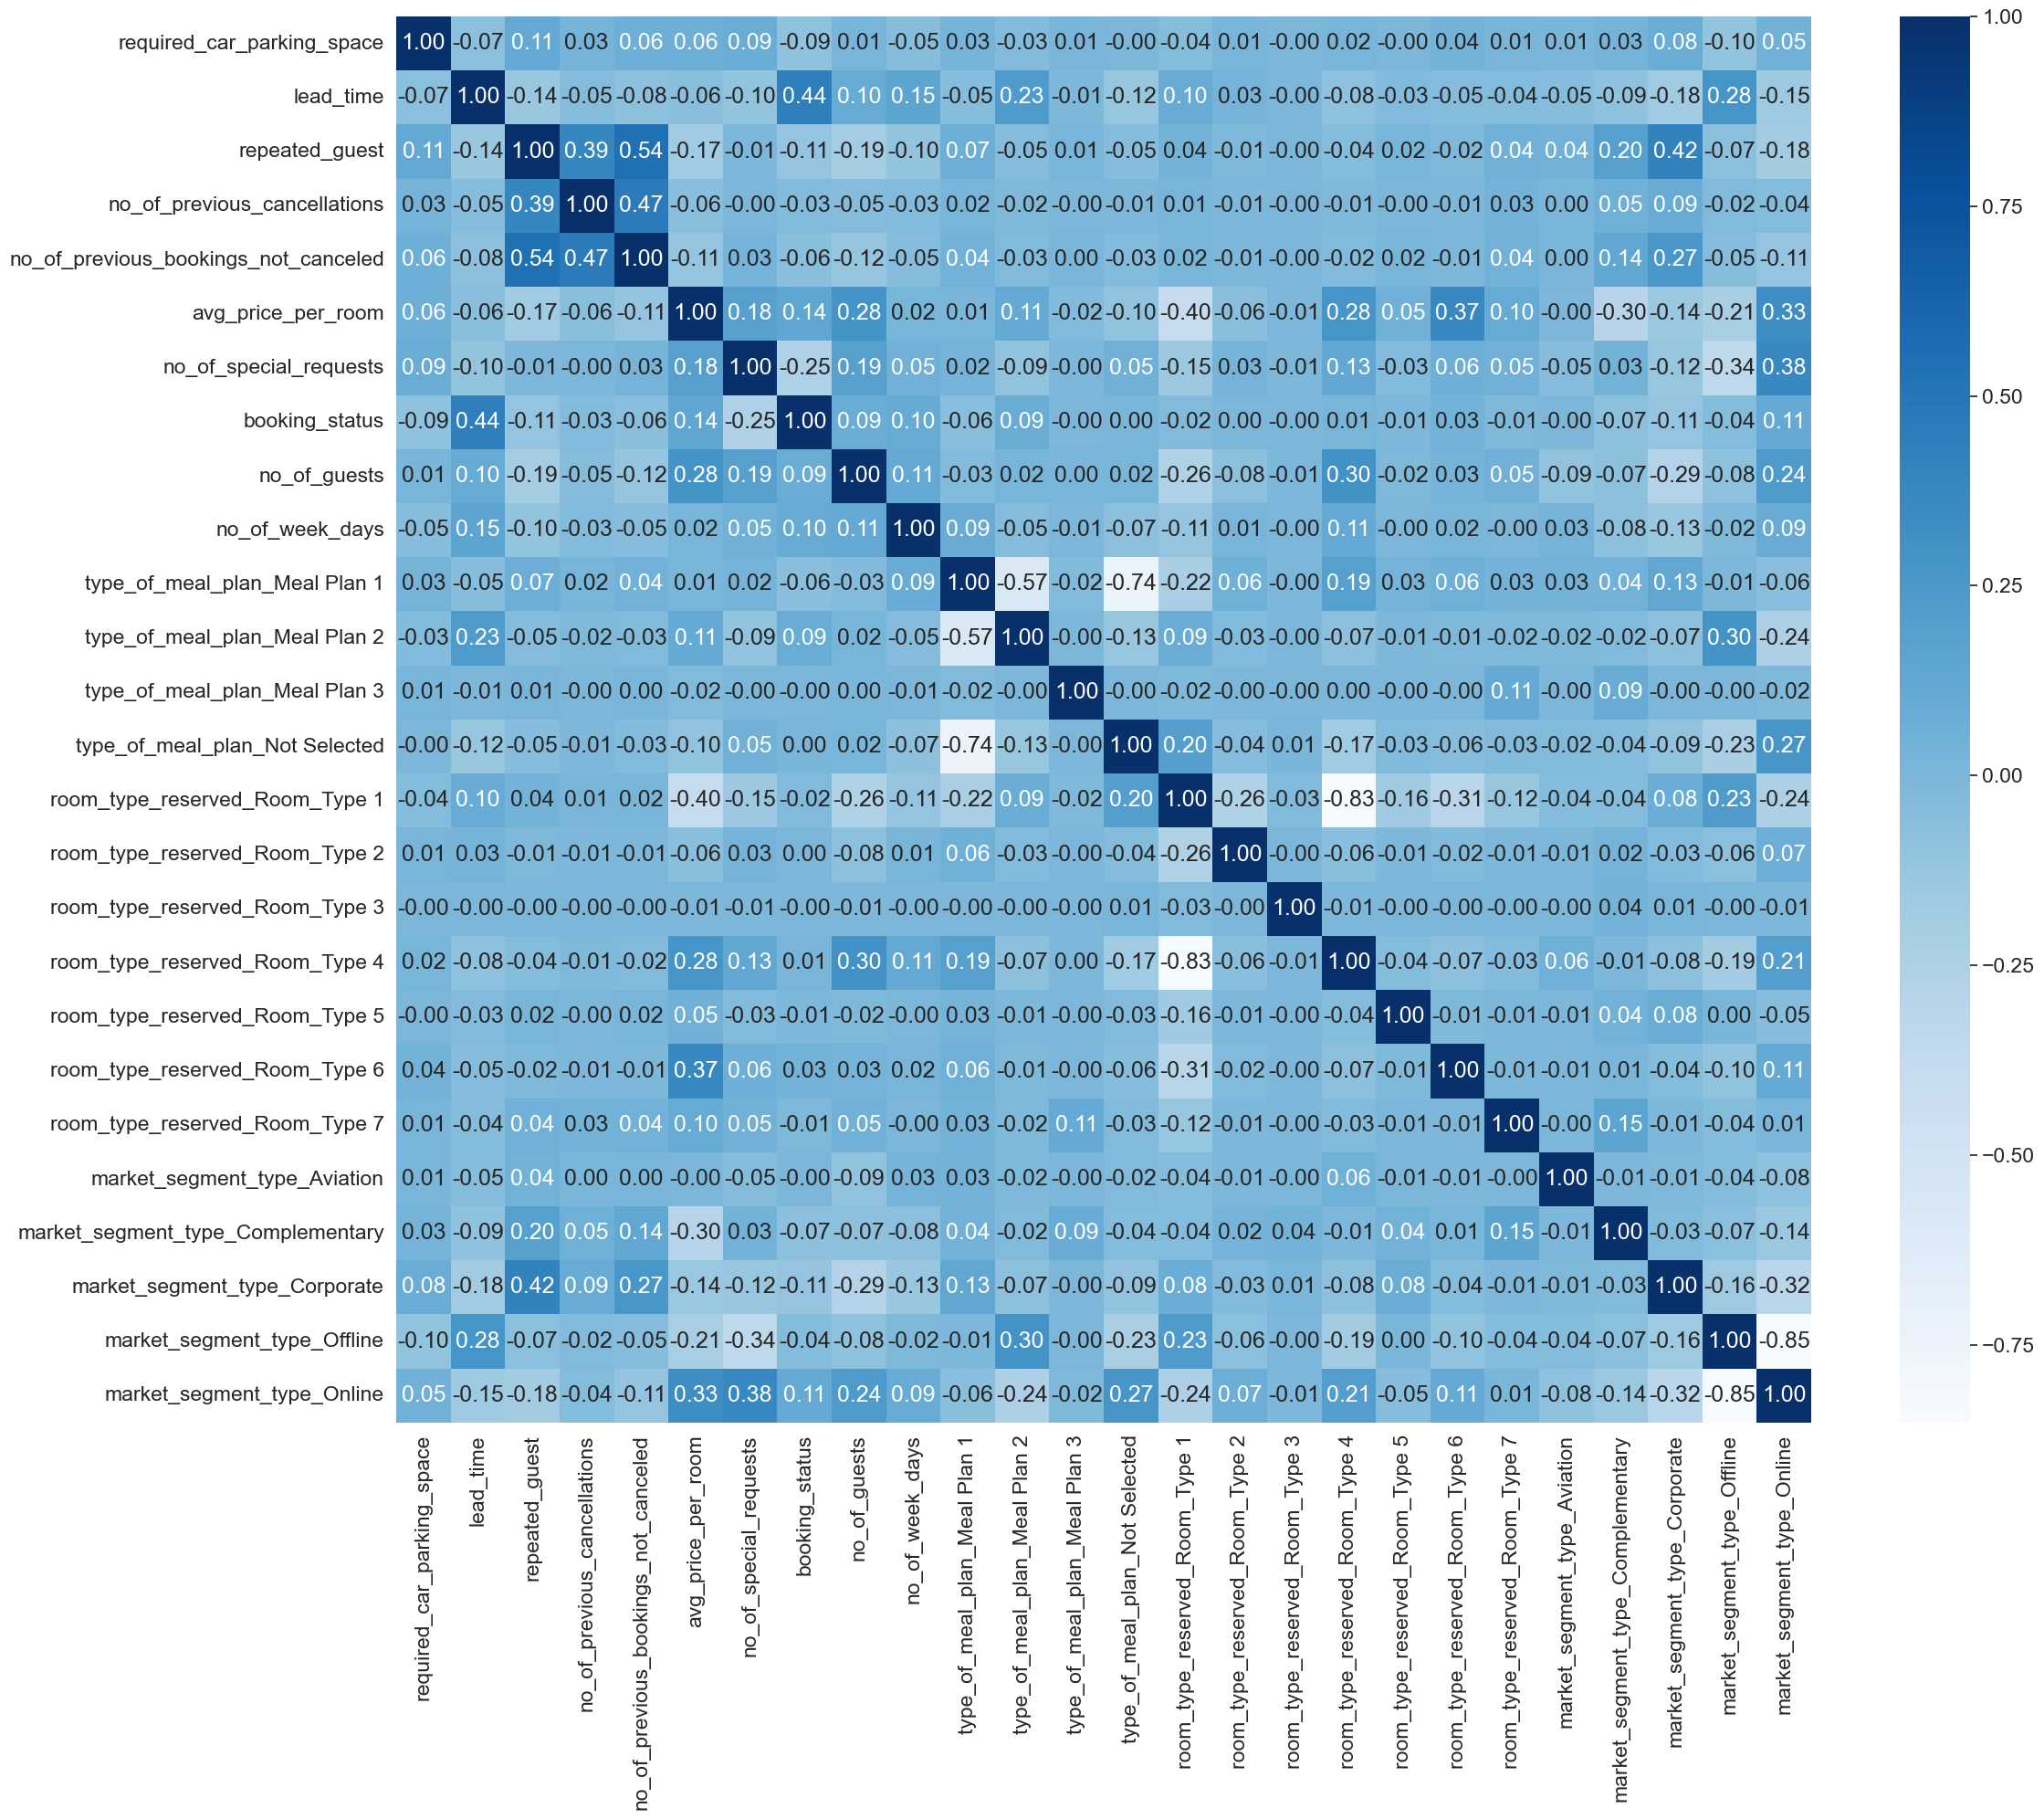

In [62]:
plt.figure(figsize=(25,20))
sns.heatmap(df_model.corr(),annot=True, fmt=".2f",cmap="Blues")

In [63]:
#there are a number of features which have low correlation with the target variable so we'll drop these

In [64]:
df_model.drop(columns=['type_of_meal_plan_Meal Plan 3','type_of_meal_plan_Not Selected','room_type_reserved_Room_Type 1','room_type_reserved_Room_Type 2',
                 'room_type_reserved_Room_Type 3','room_type_reserved_Room_Type 4','room_type_reserved_Room_Type 5',
                 'room_type_reserved_Room_Type 6','room_type_reserved_Room_Type 7','market_segment_type_Aviation',"market_segment_type_Offline"],inplace=True)

In [65]:
#Train Test split

In [66]:
X = df_model.drop(['booking_status'],axis=1)
Y = df_model['booking_status']

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

In [70]:
df_model.columns

Index(['required_car_parking_space', 'lead_time', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'no_of_guests', 'no_of_week_days', 'type_of_meal_plan_Meal Plan 1',
       'type_of_meal_plan_Meal Plan 2', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Online'],
      dtype='object')

In [76]:
#Logistic Regression Model

Accuracy is:  0.8003307911421483
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      7337
           1       0.73      0.62      0.67      3546

    accuracy                           0.80     10883
   macro avg       0.78      0.75      0.76     10883
weighted avg       0.80      0.80      0.80     10883



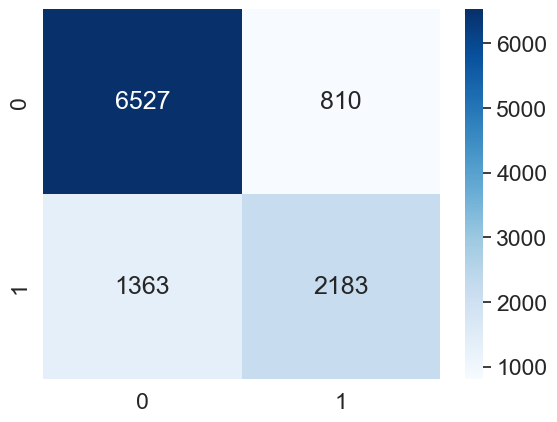

In [71]:
lin_model = LogisticRegression(solver='liblinear')
lin_model.fit(X_train, y_train)
lin_model.score(X_test, y_test)

y_pred = lin_model.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d", cmap='Blues');
print(classification_report(y_test, y_pred))

In [72]:
#Support Vector Machine Model

Accuracy is:  0.8011577689975191
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      7337
           1       0.74      0.60      0.66      3546

    accuracy                           0.80     10883
   macro avg       0.78      0.75      0.76     10883
weighted avg       0.80      0.80      0.80     10883



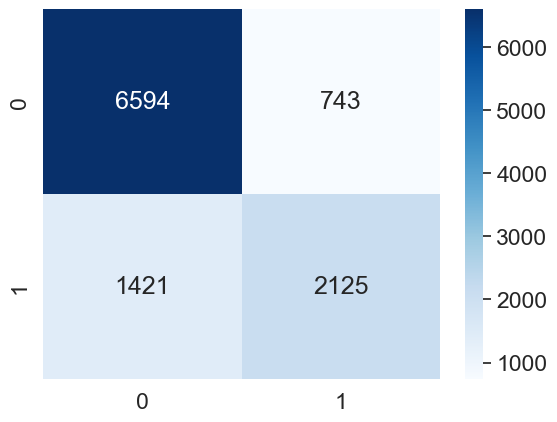

In [73]:
svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(X_train, y_train)
svc_model.score(X_test, y_test)

y_pred = svc_model.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d", cmap='Blues');
print(classification_report(y_test, y_pred))

In [74]:
#Naive Bayes Model

Accuracy is:  0.3990627584305798
              precision    recall  f1-score   support

           0       0.90      0.12      0.22      7337
           1       0.35      0.97      0.51      3546

    accuracy                           0.40     10883
   macro avg       0.62      0.55      0.36     10883
weighted avg       0.72      0.40      0.31     10883



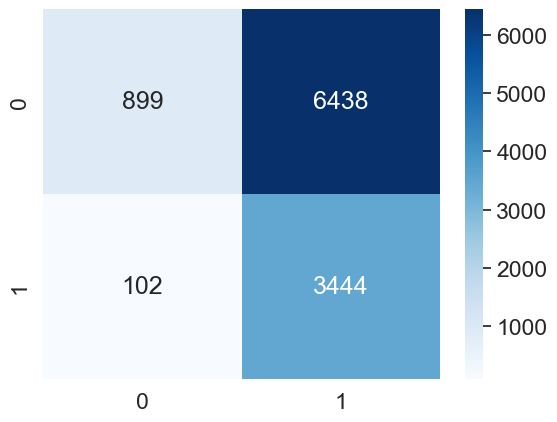

In [75]:
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, y_train)

#Predict Score 
y_pred = model.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d", cmap='Blues');
print(classification_report(y_test, y_pred))

In [ ]:
# ROC Curve

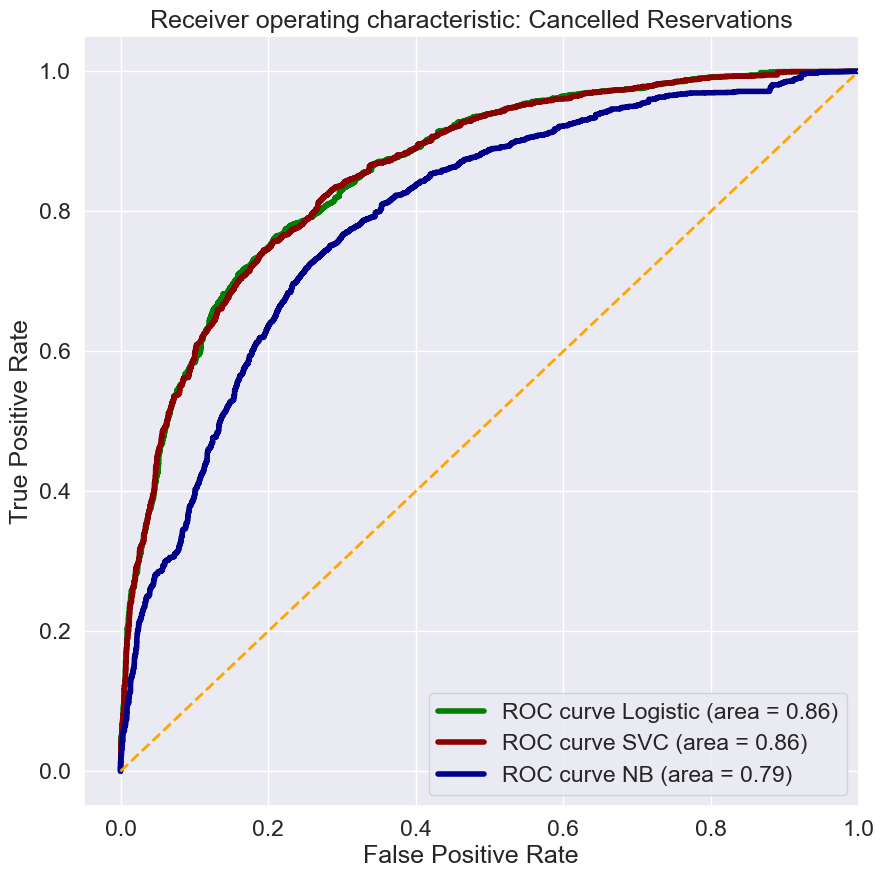

In [77]:
yhat_pp_lr = lin_model.predict_proba(X_test)[:,1]
yhat_pp_svc = svc_model.predict_proba(X_test)[:,1]
yhat_pp_nb = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, yhat_pp_lr)
fpr_svc, tpr_svc, _ = roc_curve(y_test, yhat_pp_svc)
fpr_nb, tpr_nb, _ = roc_curve(y_test, yhat_pp_nb)

plt.figure(figsize=[10,10])
lw = 2
plt.plot(fpr, tpr, label='ROC curve Logistic (area = %0.2f)' % auc(fpr, tpr), linewidth=4, color='green')
plt.plot(fpr_svc, tpr_svc, label='ROC curve SVC (area = %0.2f)' % auc(fpr_svc, tpr_svc), linewidth=4, color='darkred')
plt.plot(fpr_nb, tpr_nb, label='ROC curve NB (area = %0.2f)' % auc(fpr_nb, tpr_nb), linewidth=4, color='darkblue')
plt.plot([0, 1], [0, 1], color = 'orange', lw = lw, linestyle = '--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: Cancelled Reservations', fontsize=18)
plt.legend(loc="lower right")
plt.show()